# Error Analysis for Gauss-Legendre-Lobatto Quadrature

We test the convergence of the Gauss-Lobatto quadrature for the Star-Lanczos Inner Integrals.

In [1]:
import mpmath as mp
from mpmath import hyp2f1,quad # Needed for Hypergeometric function
mp.mp.dps = 50
def F(k,l,alpha,x):
    return legendre_P(k,x)*((-1)**l)*((1+x)**alpha)*sqrt((2*l+1)/2)*hyp2f1(l+1,-l,1+alpha,(1+x)/2)/gamma(1+alpha)

The function `F` implements the product of the basis elements for the computation of the coefficients. We can now test the accuracy of the Guass-Lobatto-Legendre quadrature rule applied to the computation of the integral
$$  (F_M)_{k,l} = \int_{-1}^{1} F(k,l,\alpha,x)\,\mathrm{d}x. $$
We use the multiprecision package quadrature to get an high precision evaluation of the integral:

In [2]:
def Itrue(k,l,alpha):
    return quad(lambda x: F(k,l,alpha,x),[-1.0,1.0])

The other information we can investigate is the oscillatory behavior of the function we wish to integrate

In [3]:
import matplotlib.pyplot as pl
import numpy as np

x = np.arange(-1,1,0.0005)
y = np.zeros((x.shape[0],4))

ik = 0
for k in [30,40,50,60]:
    for i in range(x.shape[0]):
        y[i,ik] = F(k,k,0.8,mp.mpmathify(x[i]))
    ik = ik+1

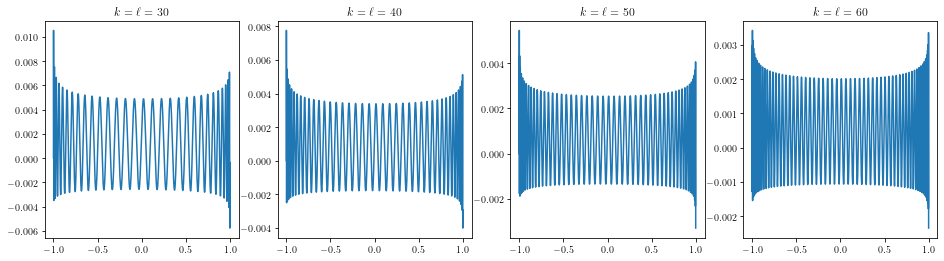

In [4]:
pl.rcParams['text.usetex'] = True
pl.rcParams['figure.figsize'] = [16, 4]
pl.subplot(141)
pl.plot(x,y[:,0])
pl.title(r'$k = \ell = 30$')
pl.subplot(142)
pl.plot(x,y[:,1])
pl.title(r'$k = \ell = 40$')
pl.subplot(143)
pl.plot(x,y[:,2])
pl.title(r'$k = \ell = 50$')
pl.subplot(144)
pl.plot(x,y[:,3])
pl.title(r'$k = \ell = 60$')
pl.savefig('oscillations.pdf',bbox_inches = 'tight')  

## Using classical quadrature formulas

Then we produce the nodes and weights of the Gauss-Legendre-Lobatto quadrature rule to numerically approximate the entries $(F_M)_{k,l}$.

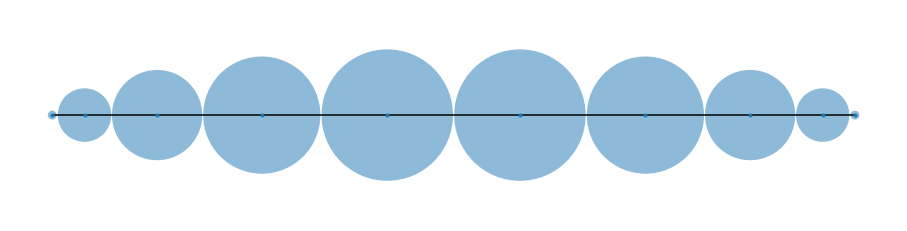

In [5]:
import quadpy
gll = quadpy.c1.gauss_lobatto(10)
gll.show() # Graphically depicts the quadrature nodes and weights
def IGLL(k,l,alpha,numnodes):
    gll = quadpy.c1.gauss_lobatto(numnodes)
    nodes = gll.points
    weights = gll.weights
    val = mp.mpmathify(0)
    for i in range(numnodes):
        val = val + mp.mpmathify(weights[i])*mp.mpmathify(F(k,l,alpha,mp.mpmathify(nodes[i])))
    return val

We can now compare the accuracy obtained by incrementing the number of nodes with respect to the value computed with the multiprecision routine.

In [6]:
def abserr(k,l,alpha,nodes):
    return mp.fabs(IGLL(k,l,alpha,nodes)-Itrue(k,l,alpha))
def relerr(k,l,alpha,nodes):
    return mp.fabs(IGLL(k,l,alpha,nodes)-Itrue(k,l,alpha))/mp.fabs(Itrue(k,l,alpha))

In [9]:
M = 60
aerr = np.zeros((M-2,1))
rerr = np.zeros((M-2,1))
for k in range(2,M,1):
    aerr[k-2] = abserr(60,60,0.5,k)
    rerr[k-2] = relerr(60,60,0.5,k)

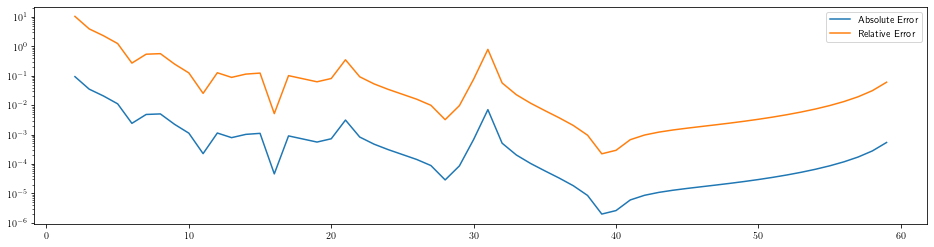

In [10]:

pl.semilogy(range(2,M,1),aerr,label='Absolute Error')
pl.semilogy(range(2,M,1),rerr,label='Relative Error')
pl.legend()
pl.show()